## 1.	Deberás utilizar el archivo llamado bank_marketing.csv. con los datos de problema.
2.	Utilizar el archivo bank-names.txt para obtener información de cada una de las variables.
3.	Crear un proyecto tipo Jupyter Notebook en Google-Colab llamado Solucion_Reto_SC_63_<nombre_y_apellido_del_estudiante>.ipynb.
4.	Incluye las librerías que consideres adecuadas y carga los datos del archivo en una variable llamada “data”.
5.	Obtener la información de dicha base de datos que incluya el número de registros, el total de variables, el tipo de cada variable, la cantidad de datos perdidos de cada variable en caso de que existan.

In [211]:
import pandas as pd
import numpy as np

data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DataSets/bank_marketing_RETO_DS_AS.csv")

data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,31,self-employed,married,tertiary,no,2666,no,no,cellular,10,nov,318,2,97,6,success,yes
1,29,unemployed,single,unknown,no,1584,no,no,cellular,6,sep,245,1,-1,0,unknown,yes
2,41,blue-collar,married,secondary,no,2152,yes,no,cellular,17,nov,369,1,-1,0,unknown,no
3,50,blue-collar,married,secondary,no,84,yes,no,cellular,17,jul,18,8,-1,0,unknown,no
4,40,admin.,married,secondary,no,0,no,no,cellular,28,jul,496,2,182,11,success,yes


In [212]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        9000 non-null   int64 
 1   job        9000 non-null   object
 2   marital    9000 non-null   object
 3   education  9000 non-null   object
 4   default    9000 non-null   object
 5   balance    9000 non-null   int64 
 6   housing    9000 non-null   object
 7   loan       9000 non-null   object
 8   contact    9000 non-null   object
 9   day        9000 non-null   int64 
 10  month      9000 non-null   object
 11  duration   9000 non-null   int64 
 12  campaign   9000 non-null   int64 
 13  pdays      9000 non-null   int64 
 14  previous   9000 non-null   int64 
 15  poutcome   9000 non-null   object
 16  y          9000 non-null   object
dtypes: int64(7), object(10)
memory usage: 1.2+ MB


## 6.	Transforma las variables categóricas de manera que puedan ser tratadas numéricamente. Justifica si utilizas LabelEncoder o OneHotEcoder.

In [213]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

#Se definen los parámetros y las columnas del Encoder
Ord_binary = OrdinalEncoder(categories = [["unknown","primary", "secondary", "tertiary"],
 ["no", "yes"], ["no", "yes"], ["no", "yes"], ["no", "yes"]])
cols = ["education", "default", "housing", "loan", "y"]

#Se hace una copia del DF
data_arreglado = data.copy()

#Se transforman mediante los parámetros ya establecidos
data_arreglado[cols] = Ord_binary.fit_transform(data_arreglado[cols]).astype("int64")

#Se eliminan unknown y se reemplazan con la media
data_arreglado["education"].replace({0:np.nan}, inplace=True)
data_arreglado["education"].replace({np.nan:data_arreglado["education"].mean()}, inplace = True)

#Se hace lo mismo pero ahora con LabelEncoder
label_cols = ["job", "month"]
le = LabelEncoder()

#Se eliminan los unknown y se cambian por la moda
data_arreglado["job"].replace({"unknown":np.nan}, inplace = True)
data_arreglado["job"].replace({np.nan:data_arreglado["job"].mode()[0]}, inplace = True)

#Se aplica LabelEncoder
data_arreglado[label_cols] = data_arreglado[label_cols].apply(le.fit_transform)


data_arreglado

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,31,6,married,3.000000,0,2666,0,0,cellular,10,9,318,2,97,6,success,1
1,29,10,single,2.191233,0,1584,0,0,cellular,6,11,245,1,-1,0,unknown,1
2,41,1,married,2.000000,0,2152,1,0,cellular,17,9,369,1,-1,0,unknown,0
3,50,1,married,2.000000,0,84,1,0,cellular,17,5,18,8,-1,0,unknown,0
4,40,0,married,2.000000,0,0,0,0,cellular,28,5,496,2,182,11,success,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,42,1,married,2.000000,0,314,1,1,unknown,16,8,269,2,-1,0,unknown,0
8996,32,1,married,2.000000,0,491,1,0,unknown,8,8,223,2,-1,0,unknown,0
8997,44,7,single,2.000000,0,2886,0,0,unknown,20,6,31,1,-1,0,unknown,0
8998,57,7,married,1.000000,0,491,1,0,cellular,15,0,1217,3,-1,0,unknown,1


In [214]:
data_arreglado.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,31,6,married,3.000000,0,2666,0,0,cellular,10,9,318,2,97,6,success,1
1,29,10,single,2.191233,0,1584,0,0,cellular,6,11,245,1,-1,0,unknown,1
2,41,1,married,2.000000,0,2152,1,0,cellular,17,9,369,1,-1,0,unknown,0
3,50,1,married,2.000000,0,84,1,0,cellular,17,5,18,8,-1,0,unknown,0
4,40,0,married,2.000000,0,0,0,0,cellular,28,5,496,2,182,11,success,1


In [215]:
data_arreglado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        9000 non-null   int64  
 1   job        9000 non-null   int64  
 2   marital    9000 non-null   object 
 3   education  9000 non-null   float64
 4   default    9000 non-null   int64  
 5   balance    9000 non-null   int64  
 6   housing    9000 non-null   int64  
 7   loan       9000 non-null   int64  
 8   contact    9000 non-null   object 
 9   day        9000 non-null   int64  
 10  month      9000 non-null   int64  
 11  duration   9000 non-null   int64  
 12  campaign   9000 non-null   int64  
 13  pdays      9000 non-null   int64  
 14  previous   9000 non-null   int64  
 15  poutcome   9000 non-null   object 
 16  y          9000 non-null   int64  
dtypes: float64(1), int64(13), object(3)
memory usage: 1.2+ MB


In [216]:
def func_onehot(df, serie):
  if "unknown" in df[serie].unique():
    df[serie].replace({"unknown":np.nan}, inplace = True)
    df[serie].replace({np.nan:df[serie].mode()[0]}, inplace = True)
    df_temporal = pd.get_dummies(df[serie], prefix=serie, dtype=int)
    df = pd.concat([df,df_temporal], axis=1)
    df.drop(serie,axis=1, inplace=True)
    return df
  else:
    df_temporal = pd.get_dummies(df[serie], prefix=serie, dtype=int)
    df = pd.concat([df,df_temporal], axis=1)
    df.drop(serie,axis=1, inplace=True)
    return df

data_arreglado = func_onehot(data_arreglado, "marital")
data_arreglado = func_onehot(data_arreglado, "contact")
data_arreglado = func_onehot(data_arreglado, "poutcome")

In [217]:
data_arreglado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                9000 non-null   int64  
 1   job                9000 non-null   int64  
 2   education          9000 non-null   float64
 3   default            9000 non-null   int64  
 4   balance            9000 non-null   int64  
 5   housing            9000 non-null   int64  
 6   loan               9000 non-null   int64  
 7   day                9000 non-null   int64  
 8   month              9000 non-null   int64  
 9   duration           9000 non-null   int64  
 10  campaign           9000 non-null   int64  
 11  pdays              9000 non-null   int64  
 12  previous           9000 non-null   int64  
 13  y                  9000 non-null   int64  
 14  marital_divorced   9000 non-null   int64  
 15  marital_married    9000 non-null   int64  
 16  marital_single     9000 

## 7.	Transforma las variables numéricas en los casos que se tenga algún tipo de sesgo

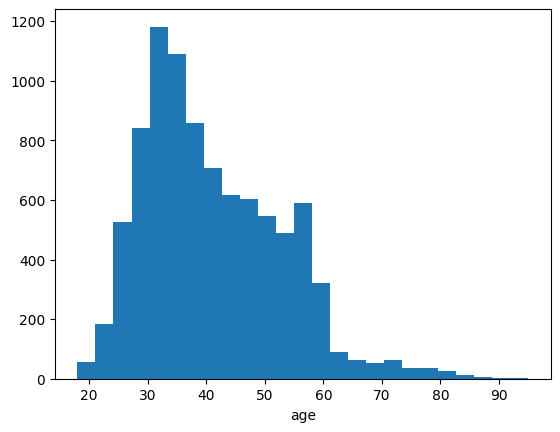

In [159]:
import matplotlib.pyplot as plt

plt.hist(data_arreglado["age"], bins=25)
plt.xlabel("age")
plt.show()

Parece que tiene un sesgo positivo, así que se le aplicará una transformación para que esté menos sesgada

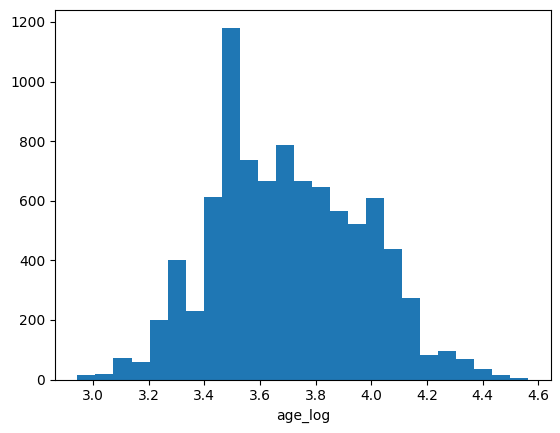

In [160]:
def trans_log(X):
  return np.log(X+1)

plt.hist(trans_log(data_arreglado["age"]), bins=25)
plt.xlabel("age_log")
plt.show()

Se analiza la distribución del balance de la cuenta

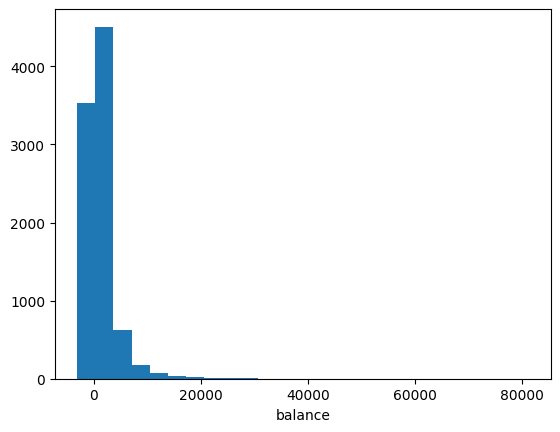

In [161]:
plt.hist(data_arreglado["balance"], bins=25)
plt.xlabel("balance")
plt.show()

Se nota un sesgo positivo aún más marcado, sin embargo presenta valores negativos, por lo que se usarán potencias fraccionarias

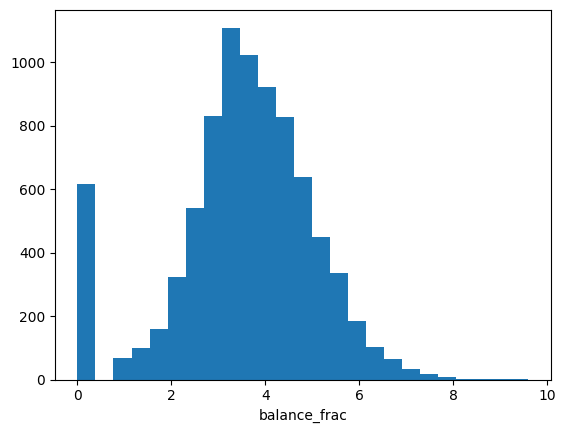

In [162]:
plt.hist(np.power(data_arreglado["balance"],0.2), bins=25)
plt.xlabel("balance_frac")
plt.show()

La siguiente variable numérica es day, sin embargo está muestra el día del mes en el que se contactó, sin embargo, no se deben transformar ya que son más datos categóricos que numéricos, así que continuamos con duration

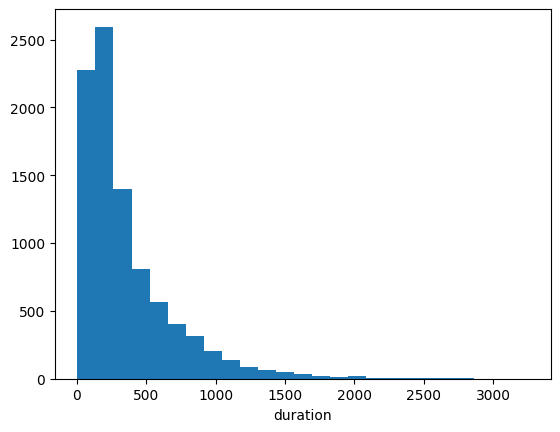

In [163]:
plt.hist(data_arreglado["duration"], bins=25)
plt.xlabel("duration")
plt.show()

No hay valores negativos, así que usamos logaritmos

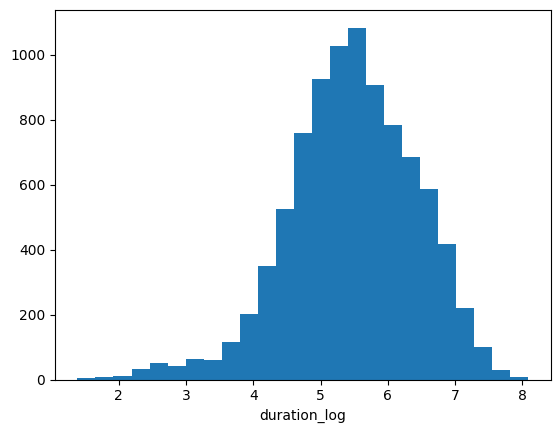

In [164]:
plt.hist(trans_log(data_arreglado["duration"]), bins=25)
plt.xlabel("duration_log")
plt.show()

El siguiente es campaign

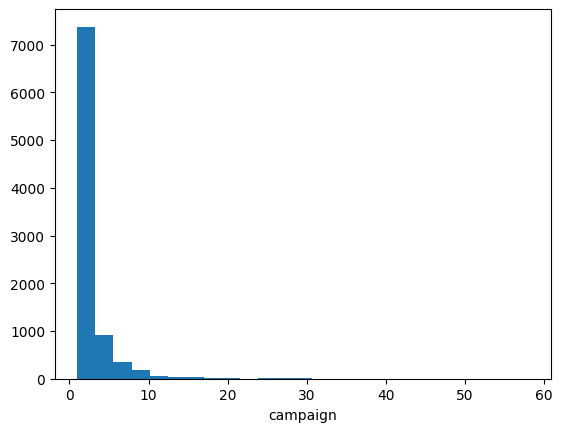

In [165]:
plt.hist(data_arreglado["campaign"], bins=25)
plt.xlabel("campaign")
plt.show()

No hay valores negativos y se usa raíz cuadrada

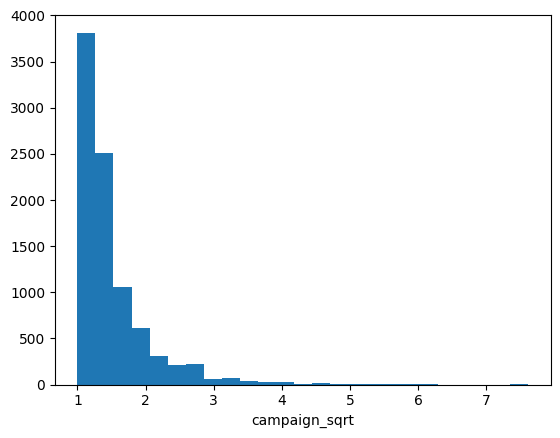

In [166]:
plt.hist(np.sqrt(data_arreglado["campaign"]), bins=25)
plt.xlabel("campaign_sqrt")
plt.show()

Continuamos con previous

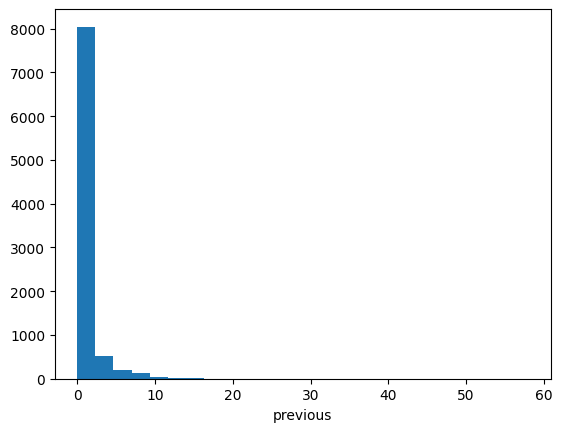

In [167]:
plt.hist(data_arreglado["previous"], bins=25)
plt.xlabel("previous")
plt.show()

No hay valores negativos y volvemos a realizar raíz

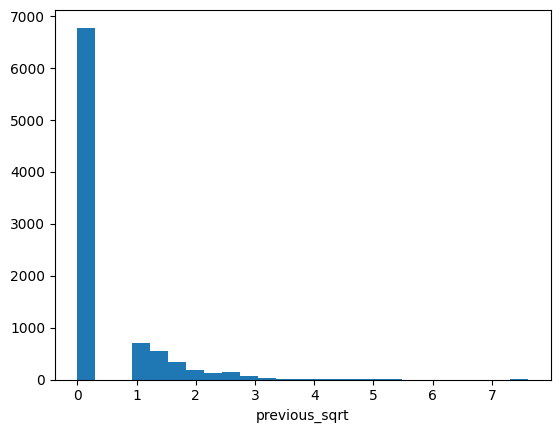

In [168]:
plt.hist(np.sqrt(data_arreglado["previous"]), bins=25)
plt.xlabel("previous_sqrt")
plt.show()

Se transforman en el dataframe

In [223]:
#Se definen las columnas con las que se usó log, fraccionarias y raíz cuadrada
log_cols = ["age", "duration"]
frac_cols = "balance"
sqrt_cols = ["campaign", "previous"]

#Se realizan las transformaciones logarítmicas
data_arreglado[log_cols] = data_arreglado[log_cols].apply(trans_log)
data_arreglado[frac_cols] = np.sign(data_arreglado[frac_cols])*np.abs(data_arreglado[frac_cols])**0.2
data_arreglado[sqrt_cols] = data_arreglado[sqrt_cols].apply(np.sqrt)

## 8.	Considera la variable “y” como la variable de salida y el resto de las variables como las variables de entrada.

In [224]:
Y = data_arreglado["y"].values
X = data_arreglado[data_arreglado.columns.drop("y")].values

Y.shape

(9000,)

In [225]:
X.shape

(9000, 21)

## 9.	Particiona los datos en los conjuntos de entrenamiento, validación y prueba en 60%, 20% y 20%, respectivamente.

In [226]:
from sklearn.model_selection import train_test_split

X_train, X_valandtest, Y_train, Y_valandtest = train_test_split(X,Y, train_size=0.6)

X_test, X_val, Y_test, Y_val = train_test_split(X_valandtest, Y_valandtest, train_size=0.5)

In [227]:
print(Y.shape)
print(Y_train.shape)
print(Y_test.shape)
print(Y_val.shape)

(9000,)
(5400,)
(1800,)
(1800,)


## 10.	Aplica el modelo Regresión Logística en el conjunto de entrenamiento. Valida el modelo con las predicciones del conjunto de validación y su matriz de confusión. Ajusta los parámetros del modelo hasta obtener tu mejor resultado.

In [228]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

parameters = {"C": [0.1, 0.15, 0.18, 0.2, 0.22, 0.24, 0.28, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
              "penalty": ("l2", "elasticnet", "None"),
              "solver": ("newton-cg", "saga", "lbfgs", "sag")}

RL_grid = LogisticRegression(max_iter=10000)
modelo_RL = GridSearchCV(RL_grid, parameters)

modelo_RL.fit(X_train, np.ravel(Y_train))

print(modelo_RL.best_params_, "\n", modelo_RL.best_score_)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
600 fits failed out of a total of 900.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
75 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Sol

{'C': 0.9, 'penalty': 'l2', 'solver': 'newton-cg'} 
 0.8075925925925926


In [229]:
modelo_RL.score(X_test, Y_test)

0.8094444444444444

In [230]:
modelo_RL.score(X_val, Y_val)

0.8011111111111111

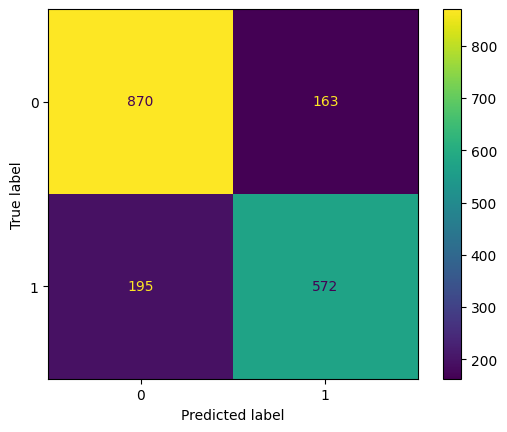

In [259]:
# from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

predictions = modelo_RL.predict(X_val)
cm = confusion_matrix(Y_val, predictions, labels=modelo_RL.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=modelo_RL.classes_)

disp.plot()

## 11.	Aplica el modelo Red Neuronal en el conjunto de entrenamiento. Valida el modelo con las predicciones del conjunto de validación y su matriz de confusión. Ajusta los parámetros del modelo hasta obtener tu mejor modelo, entre ellos el número de neuronas y capas ocultas.

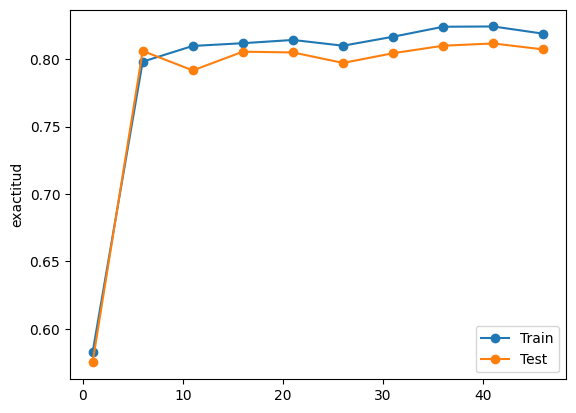

In [248]:
from sklearn.neural_network import MLPClassifier

neuronas = [i for i in range (1,50,5)]

train_scores, test_scores = list(), list()
train_errors, test_errors = list(), list()

for i in neuronas:

  modelo_RN = MLPClassifier(hidden_layer_sizes=(i,i),
                            max_iter=3000,
                            alpha=0.9)

  modelo_RN.fit(X_train, Y_train)

  #Conjunto de Entrenamiento
  train_yhat = modelo_RN.predict(X_train)
  train_loss = np.mean(abs(Y_train -  train_yhat))
  train_errors.append(train_loss)

  train_acc = 1-train_loss
  train_scores.append(train_acc)

  #Conjunto de Prueba
  test_yhat = modelo_RN.predict(X_test)
  test_loss = np.mean(abs(Y_test -  test_yhat))
  test_errors.append(test_loss)

  test_acc = 1-test_loss
  test_scores.append(test_acc)

plt.plot(neuronas, train_scores, "-o", label="Train")
plt.plot(neuronas, test_scores, "-o", label="Test")
plt.legend()
plt.ylabel("exactitud")
plt.show()

In [249]:
print(max(test_scores))
print(neuronas[test_scores.index(max(test_scores))])

0.8116666666666666
41


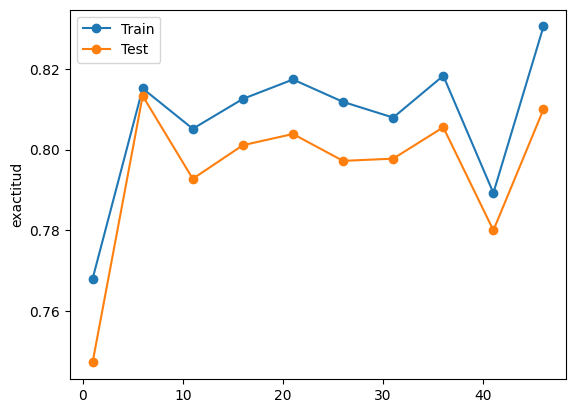

In [241]:
train_scores, test_scores = list(), list()
train_errors, test_errors = list(), list()

for i in neuronas:

  modelo_RN = MLPClassifier(hidden_layer_sizes=(31,i),
                            max_iter=3000,
                            alpha=0.9)

  modelo_RN.fit(X_train, Y_train)

  #Conjunto de Entrenamiento
  train_yhat = modelo_RN.predict(X_train)
  train_loss = np.mean(abs(Y_train -  train_yhat))
  train_errors.append(train_loss)

  train_acc = 1-train_loss
  train_scores.append(train_acc)

  #Conjunto de Prueba
  test_yhat = modelo_RN.predict(X_test)
  test_loss = np.mean(abs(Y_test -  test_yhat))
  test_errors.append(test_loss)

  test_acc = 1-test_loss
  test_scores.append(test_acc)

plt.plot(neuronas, train_scores, "-o", label="Train")
plt.plot(neuronas, test_scores, "-o", label="Test")
plt.legend()
plt.ylabel("exactitud")
plt.show()

In [247]:
print(max(test_scores))
print(neuronas[test_scores.index(max(test_scores))])

0.8133333333333334
6


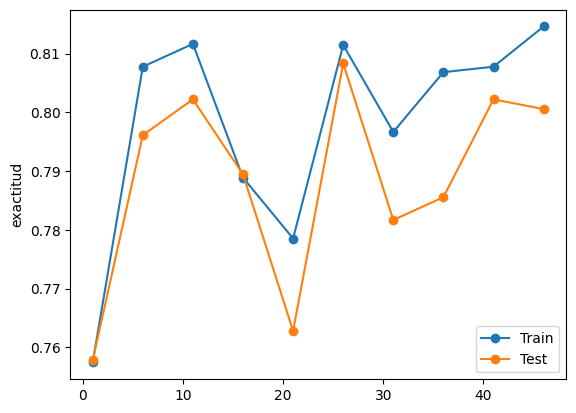

In [250]:
train_scores, test_scores = list(), list()
train_errors, test_errors = list(), list()

for i in neuronas:

  modelo_RN = MLPClassifier(hidden_layer_sizes=(i,31),
                            max_iter=3000,
                            alpha=0.9)

  modelo_RN.fit(X_train, Y_train)

  #Conjunto de Entrenamiento
  train_yhat = modelo_RN.predict(X_train)
  train_loss = np.mean(abs(Y_train -  train_yhat))
  train_errors.append(train_loss)

  train_acc = 1-train_loss
  train_scores.append(train_acc)

  #Conjunto de Prueba
  test_yhat = modelo_RN.predict(X_test)
  test_loss = np.mean(abs(Y_test -  test_yhat))
  test_errors.append(test_loss)

  test_acc = 1-test_loss
  test_scores.append(test_acc)

plt.plot(neuronas, train_scores, "-o", label="Train")
plt.plot(neuronas, test_scores, "-o", label="Test")
plt.legend()
plt.ylabel("exactitud")
plt.show()

In [251]:
print(max(test_scores))
print(neuronas[test_scores.index(max(test_scores))])

0.8083333333333333
26


El mejor valor fue en el segundo test con una capa de 31, 6 neuronas, ahora variaremos el valor de alfa, para ver si existe una mejor combinación

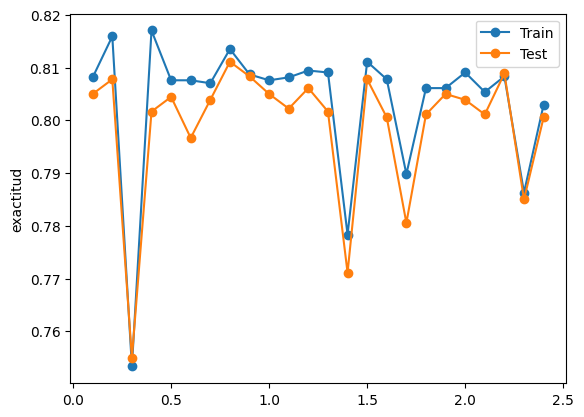

In [254]:
valores_alfa = [i/10 for i in range (1, 25, 1)]

train_scores, test_scores = list(), list()
train_errors, test_errors = list(), list()

for i in valores_alfa:

  modelo_RN = MLPClassifier(hidden_layer_sizes=(6,31),
                            max_iter=3000,
                            alpha=i)

  modelo_RN.fit(X_train, Y_train)

  #Conjunto de Entrenamiento
  train_yhat = modelo_RN.predict(X_train)
  train_loss = np.mean(abs(Y_train -  train_yhat))
  train_errors.append(train_loss)

  train_acc = 1-train_loss
  train_scores.append(train_acc)

  #Conjunto de Prueba
  test_yhat = modelo_RN.predict(X_test)
  test_loss = np.mean(abs(Y_test -  test_yhat))
  test_errors.append(test_loss)

  test_acc = 1-test_loss
  test_scores.append(test_acc)

plt.plot(valores_alfa, train_scores, "-o", label="Train")
plt.plot(valores_alfa, test_scores, "-o", label="Test")
plt.legend()
plt.ylabel("exactitud")
plt.show()

In [257]:
print(max(test_scores))
print(valores_alfa[test_scores.index(max(test_scores))])

0.8111111111111111
0.8


De acuerdo a estas pruebas, los mejores resultados se obtuvieron con un número de neuronas de 6 y 31 y un valor de alfas de 0.8. A copntinuación graficaremos la matriz de confusión

In [ ]:
modelo_RN = MLPClassifier(hidden_layer_sizes=(6,31),
                          max_iter=3000,
                          alpha=0.8)

modelo_RN.fit(X_train, Y_train)

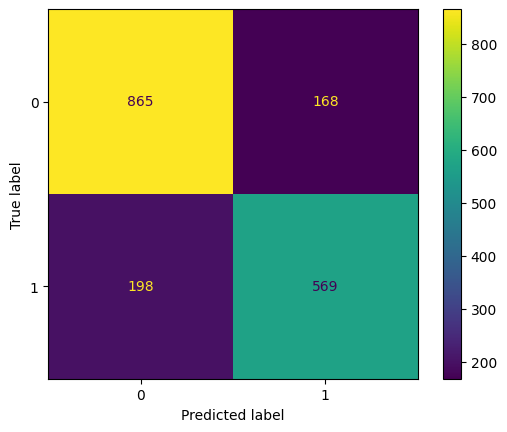

In [260]:
predictions = modelo_RN.predict(X_val)
cm = confusion_matrix(Y_val, predictions, labels=modelo_RN.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=modelo_RN.classes_)

disp.plot()

## 12.	Selecciona el mejor modelo encontrado en los incisos anteriores y utiliza el conjunto de prueba para obtener el desempeño final del modelo y su matriz de confusión.

El mejor modelo para los valores de validación fue el modelo de regresión logística, aun que por muy poco

In [261]:
modelo_RL.score(X_test,Y_test)

0.8094444444444444

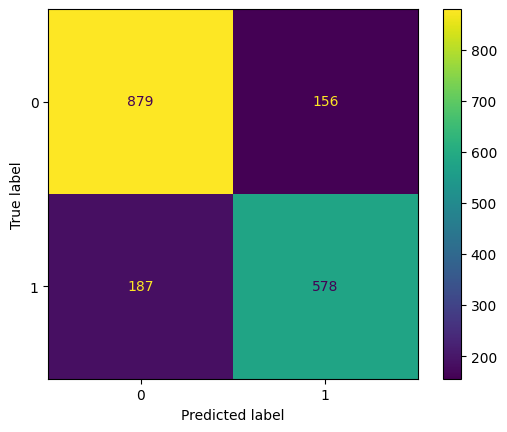

In [262]:
predictions = modelo_RL.predict(X_test)
cm = confusion_matrix(Y_test, predictions, labels=modelo_RL.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=modelo_RL.classes_)

disp.plot()